In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlrose
import time
import NNOptimizer
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv("BreastCancerData.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Normalize y
y = data['diagnosis']
binarizer = LabelBinarizer()
y1 = binarizer.fit_transform(y).flatten()
y1 = pd.Series(data=y1)

In [3]:
# Normalize x
x = data.drop(['id', 'diagnosis','Unnamed: 32'], axis='columns')
scaler = StandardScaler()
scaler.fit(x)
x1 = scaler.transform(x.values)
x1 = pd.DataFrame(data=x1)
x1.columns = x.columns

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)
result = {}

In [5]:
# Fit NN with backpropagation
NN_BP = MLPClassifier(max_iter=10000, activation='logistic', hidden_layer_sizes=10)
t = time.time()
NN_BP.fit(X_train, y_train)
t = time.time()- t

y_train_pred = NN_BP.predict(X_train)
y_test_pred = NN_BP.predict(X_test)
result['BP']={}
result['BP']['train_accuracy'] = accuracy_score(y_train, y_train_pred)
result['BP']['test_accuracy'] = accuracy_score(y_test, y_test_pred)
result['BP']['train_time'] = t

In [6]:
result['BP']

{'train_accuracy': 0.9868131868131869,
 'test_accuracy': 0.9649122807017544,
 'train_time': 0.37416505813598633}

In [10]:
max_attempts_range = range(10, 30, 10)
restarts_range = range(10, 30, 10)
threshold = 0.9
result['RC'] = NNOptimizer.NN_RC_maximizer(max_attempts_range, restarts_range, X_train, X_test, y_train, y_test, threshold)

{'threshold_reached': True,
 'train_accuracy': 0.9120879120879121,
 'test_accuracy': 0.9035087719298246,
 'train_time': 34.57576322555542,
 'parameters': {'max_attempts': 10, 'restarts': 10}}

In [11]:
max_attempts_range = range(50, 100, 10)
init_temp_range = [1]
decay = 0.99
temp_min = 0.01
threshold = 0.9
result['SA'] = NNOptimizer.NN_SA_maximizer(max_attempts_range, init_temp_range, decay, temp_min,
                                           X_train, X_test, y_train, y_test, threshold)

{'threshold_reached': False,
 'train_accuracy': 0.7758241758241758,
 'test_accuracy': 0.7105263157894737,
 'train_time': 15.753067016601562,
 'parameters': {'max_attempts': 60, 'init_temp': 1}}

In [12]:
max_attempts_range = range(20, 60, 10)
pop_size_range = range(20, 60, 10)
mutation_prob_range = [0.1, 0.3]
threshold = 0.95
result['GA'] = NNOptimizer.NN_GA_maximizer(max_attempts_range, pop_size_range, mutation_prob_range,
                                           X_train, X_test, y_train, y_test, threshold)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encount

In [13]:
result

{'BP': {'train_accuracy': 0.9868131868131869,
  'test_accuracy': 0.9649122807017544,
  'train_time': 0.37416505813598633},
 'RC': {'threshold_reached': True,
  'train_accuracy': 0.9120879120879121,
  'test_accuracy': 0.9035087719298246,
  'train_time': 34.57576322555542,
  'parameters': {'max_attempts': 10, 'restarts': 10}},
 'SA': {'threshold_reached': False,
  'train_accuracy': 0.7758241758241758,
  'test_accuracy': 0.7105263157894737,
  'train_time': 15.753067016601562,
  'parameters': {'max_attempts': 60, 'init_temp': 1}},
 'GA': {'threshold_reached': True,
  'train_accuracy': 0.9714285714285714,
  'test_accuracy': 0.9385964912280702,
  'train_time': 3.83910870552063,
  'parameters': {'max_attempts': 50, 'pop_size': 50, 'mutation_prob': 0.3}}}

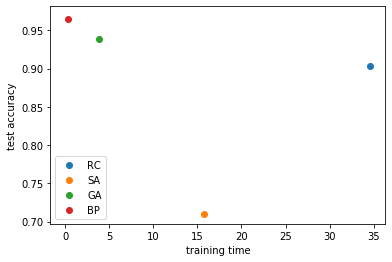

In [17]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
groups = ['RC', 'SA', 'GA', 'BP']
for i in range(4):
    color = colors[i]
    group = groups[i]
    plt.scatter(x=result[group]['train_time'], y=result[group]['test_accuracy'], c=color, label=group)
    
plt.xlabel('training time')
plt.ylabel('test accuracy')
plt.legend(loc=3)
plt.show()

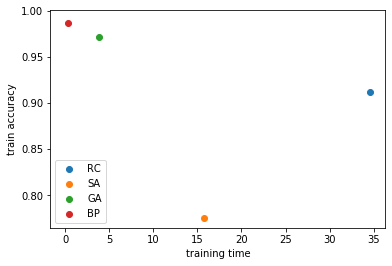

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
groups = ['RC', 'SA', 'GA', 'BP']
for i in range(4):
    color = colors[i]
    group = groups[i]
    plt.scatter(x=result[group]['train_time'], y=result[group]['train_accuracy'], c=color, label=group)
    
plt.xlabel('training time')
plt.ylabel('train accuracy')
plt.legend(loc=3)
plt.show()